## PCA

Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe

2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

3. Convert text columns to numbers using label encoding and one hot encoding

4. Apply scaling

5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

6. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/nikhilbansal/Documents/Coding/Python/data/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [5]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [6]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

RestingBP


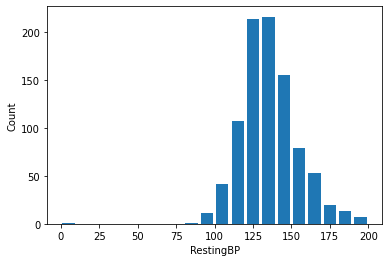

Cholesterol


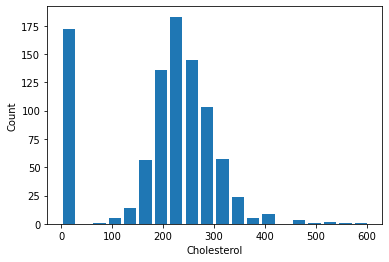

FastingBS


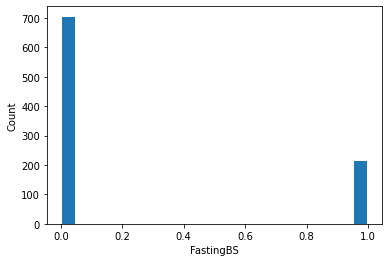

MaxHR


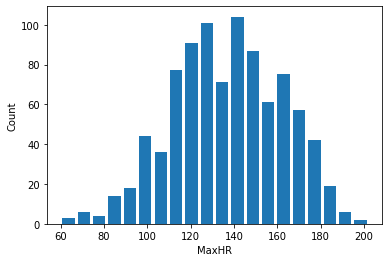

Oldpeak


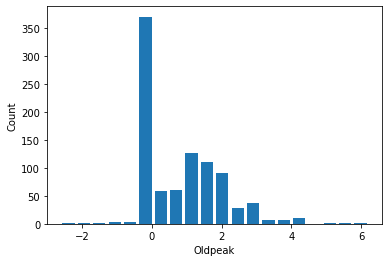

In [7]:
## RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak

list = ["RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

for x in list:
    print(x)
    plt.hist(df[x], bins=20, rwidth=0.8)
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()

In [8]:
## calculate Z score for the features that might have outlier 
list_outlier_features = ["RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

df['z_score_RestingBP'] = (df.RestingBP - df.RestingBP.mean())/df.RestingBP.std()

In [9]:
df[(df.z_score_RestingBP > 3)  | (df.z_score_RestingBP < -3)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,z_score_RestingBP
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0,3.111322
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1,3.651449
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1,3.651449
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1,3.651449
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,-7.151097
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1,3.111322
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1,3.651449
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1,3.219347


In [10]:
df_no_outliers = df[(df.z_score_RestingBP > -3)  & (df.z_score_RestingBP < 3)]

In [11]:
df_no_outliers.shape[0]

910

In [12]:
df = df_no_outliers
df.shape[0]

910

In [13]:
df['z_score_Cholesterol'] = (df.Cholesterol - df.Cholesterol.mean())/df.Cholesterol.std()

<ipython-input-13-56e6ce19adc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score_Cholesterol'] = (df.Cholesterol - df.Cholesterol.mean())/df.Cholesterol.std()


In [14]:
df_no_outliers = df[(df.z_score_Cholesterol > -3)  & (df.z_score_Cholesterol < 3)]
df_no_outliers.shape[0]

907

In [15]:
df = df_no_outliers
df.shape[0]

907

In [16]:
df['z_score_MaxHR'] = (df.MaxHR - df.MaxHR.mean())/df.MaxHR.std()

In [17]:
df_no_outliers = df[(df.z_score_MaxHR > -3)  & (df.z_score_MaxHR < 3)]
df_no_outliers.shape[0]

906

In [18]:
df = df_no_outliers
df.shape[0]

906

In [19]:
df['z_score_Oldpeak'] = (df.Oldpeak - df.Oldpeak.mean())/df.Oldpeak.std()

In [20]:
df_no_outliers = df[(df.z_score_Oldpeak > -3)  & (df.z_score_Oldpeak < 3)]
df_no_outliers.shape[0]

899

In [21]:
df = df_no_outliers
df.shape[0]

899

In [22]:
df = df.drop(['z_score_RestingBP','z_score_Cholesterol','z_score_MaxHR','z_score_Oldpeak'], axis='columns')

In [23]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

## Ordinal Categoires use LabelEncoder - can have a level low, medium, high
# RestingECG ExerciseAngina ST_Slope

df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

In [25]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,2,0
1,49,F,NAP,160,180,0,1,156,0,1.0,1,1
2,37,M,ATA,130,283,0,2,98,0,0.0,2,0
3,48,F,ASY,138,214,0,1,108,1,1.5,1,1
4,54,M,NAP,150,195,0,1,122,0,0.0,2,0


In [27]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [28]:
# Sex & ChestPainType will use dummy approach

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,2,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,1,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,2,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,1,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,2,0,1,0,1,0


In [31]:
X = df_encoded.drop("HeartDisease", axis="columns")
y = df_encoded.HeartDisease

In [32]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,2,1,1,0,0
1,49,160,180,0,1,156,0,1.0,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,2,1,1,0,0
3,48,138,214,0,1,108,1,1.5,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,2,1,0,1,0


In [34]:
## Scaling of the input

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-1.42815446,  0.46590022,  0.84963584, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       [-0.47585532,  1.63471366, -0.16812204, ..., -0.48465463,
         1.86949191, -0.22955001],
       [-1.7455875 , -0.1185065 ,  0.79361247, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       ...,
       [ 0.3706328 , -0.1185065 , -0.62564622, ..., -0.48465463,
        -0.5349047 , -0.22955001],
       [ 0.3706328 , -0.1185065 ,  0.35476274, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       [-1.63977649,  0.34901888, -0.21480818, ..., -0.48465463,
         1.86949191, -0.22955001]])

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.3,random_state=42)

In [42]:
X_train.shape

(629, 13)

In [43]:
X_test.shape

(270, 13)

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8740740740740741

### Use PCA to reduce dimensions


In [47]:
X_scale.shape

(899, 13)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
df_pca = pca.fit_transform(X_scale)
df_pca

array([[-2.78860827, -0.21462898, -1.45128542, ..., -0.1477233 ,
         0.39336792, -0.258569  ],
       [-0.70549263, -0.96801058,  1.69799607, ..., -1.52222141,
         0.98274336,  0.094844  ],
       [-1.69926024,  1.0643039 , -2.340946  , ...,  0.87342384,
         1.23146987,  0.60341616],
       ...,
       [ 1.63048361,  0.04379165, -0.42512046, ..., -0.37164746,
        -0.23381742, -0.20247973],
       [-2.20520839, -1.3500619 , -0.67694023, ..., -0.9640704 ,
         0.62369161, -1.09934631],
       [-2.07647714,  0.58857078,  1.78400011, ..., -0.58325248,
         0.14474376,  0.025471  ]])

In [51]:
df_pca.shape

(899, 12)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_pca,y,test_size=0.3,random_state=42)

In [50]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8148148148148148

### Dimensonality Curse = PCA is called for dimensonality reduction technique

Scale Features before applying PCA
Accuracy might drop

In real world might need to reduce number of features to have good processing.